# Phase 1: Introduction
Participants are faced with a multi-armed bandit problem where they sample vessels with undisclosed contents and no priors. The setting is a life-threatening one in which they are trying to find out which drugs are safe for public consumption.

## *Setting: Sampling drugs for safety*

The following shows the prompts and images for the this setting.

In [122]:
# Prompt to the prober in the drug safety setting
prompt_drugs = "In this experiment, you are a researcher conducting a critical investigation into drug safety for public consumption. Your responsibility involves finding safe pills from a collection of containers. You will get fifteen attempts to sample from any of the three containers depicted. Some containers may contain a higher concentration of safe pills than others. You can use all of your attempts in the same container or explore multiple! \n\nSample a pill from a container by clicking on it. When you get a pill, you’ll see a number on a scale from 1-10. Values below 5 indicate that the pill is not safe, where a value of 1 indicates poison. Values above 5 indicate that the pill is safe, with higher values corresponding to stronger health benefits. You’ll get a score equal to the sum of all of the numbers that you see. Try to find safe, high-valued pills. \n\n You will see your next instructions after sampling"
print("Prompt in Setting 1\n")
print(prompt_drugs)

# maximize their score function
# 15 draws?

Prompt in Setting 1

In this experiment, you are a researcher conducting a critical investigation into drug safety for public consumption. Your responsibility involves finding safe pills from a collection of containers. You will get fifteen attempts to sample from any of the three containers depicted. Some containers may contain a higher concentration of safe pills than others. You can use all of your attempts in the same container or explore multiple! 

Sample a pill from a container by clicking on it. When you get a pill, you’ll see a number on a scale from 1-10. Values below 5 indicate that the pill is not safe, where a value of 1 indicates poison. Values above 5 indicate that the pill is safe, with higher values corresponding to stronger health benefits. You’ll get a score equal to the sum of all of the numbers that you see. Try to find safe, high-valued pills. 

 You will see your next instructions after sampling


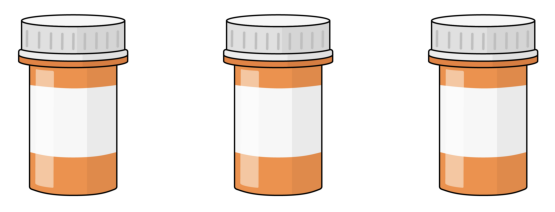

In [123]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image file
image_path = "pill_image.png"

# Desired width for each image
image_width = 200  # Adjust this value according to your preference

# Display three copies of the resized image side by side
fig, axs = plt.subplots(1, 3, figsize=(image_width * 3 / 80, image_width / 80))
for ax in axs:
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.axis('off')

plt.show()

# Phase 2: Sampling

The participants will now click on the images for a total of ten samples.

## *Defining the possible distributions*

There will be two possible distributions of content quality in urns.
1. **Equal distributions**: all urns have the same distribution of content. In this setting, each urn is relatively high quality and has a Gaussian distributions of values centered around 7 with a standard deviation of 2.
2. **One bad urn**: two urns are relatively high quality and one is relatively low quality. In this setting, the high quality urns have a Gaussian distributions of values centered around 6 with a standard deviation of 2. The low quality urn has a Gaussian distribution of values centered around 3 with a standard deviation of 2.

In [124]:
# Defining urns
import numpy as np
import random

class Urn:
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def draw(self):
        return round(np.random.normal(self.mean, self.std))
    
high_quality_urn = Urn(mean=7, std=2)
high_quality_sample = high_quality_urn.draw()
print("High-Quality Urn Sample:", high_quality_sample)

low_quality_urn = Urn(mean=3, std=2)
low_quality_sample = low_quality_urn.draw()
print("Low-Quality Urn Sample:", low_quality_sample)

High-Quality Urn Sample: 8
Low-Quality Urn Sample: 0


In [125]:
# Make a setting of three urns with either the "equal" distribution or the "one_bad_urn" distribution
class ExperimentSetting:
    def __init__(self, distribution_type):
        if distribution_type == "equal":
            self.urns = [Urn(mean=7, std=1) for _ in range(3)]
        elif distribution_type == "one_bad_urn":
            self.urns = [Urn(mean=7, std=1) for _ in range(2)] + [Urn(mean=4, std=1)]
            
# Setting with equal distribution
equal_distribution_setting = ExperimentSetting(distribution_type="equal")

# Setting with one bad urn
one_bad_urn_setting = ExperimentSetting(distribution_type="one_bad_urn")

## *Creating participants (with histories) who take draws*

Participants will take draws. They will be initialized with the urn content distributions. They can take draws from a particular bin with the add_sample_from_bin function. Their draws are recorded in the self.samples array. Note that all urns are equal in the "equal" distribution, but that the bad urn in the "one bad urn" distrubtion is stored in self.experiment_setting.urns[2]. We can keep the internal structure (in which the third urn in the bad one) consistent across all experiments, but shift the visual location of the image corresponding to the bad urn on the screen.

In [126]:
# Keeps track of an individual's history and setting across ten samples for their distribution
class Individual:
    def __init__(self, dist_type):
        self.samples = []
        self.experiment_setting = ExperimentSetting(distribution_type=dist_type)
        self.sum = 0

    def add_sample_from_bin(self, bin_number):
        value = self.experiment_setting.urns[bin_number].draw()
        self.samples.append({"bin": bin_number, "value":value})
        self.sum = self.sum + value
        print(f"You drew a pill with value {value}")
        print(f"Total score: {self.sum}")
        
    def print_samples(self):
        print("Here are your samples:")
        for sample in self.samples:
            print(f"   from bin {sample['bin']}, you sampled the value {sample['value']}")

In [127]:
# Individual history for someone in the equal distribution who samples random bins
individual = Individual("equal")
for i in range(1, 15):
    random_number = random.random()
    if random_number < 1/3:
        individual.add_sample_from_bin(0)
    elif random_number < 2/3:
        individual.add_sample_from_bin(1)
    else:
        individual.add_sample_from_bin(2)
individual.print_samples()

You drew a pill with value 8
Total score: 8
You drew a pill with value 7
Total score: 15
You drew a pill with value 6
Total score: 21
You drew a pill with value 7
Total score: 28
You drew a pill with value 8
Total score: 36
You drew a pill with value 8
Total score: 44
You drew a pill with value 7
Total score: 51
You drew a pill with value 7
Total score: 58
You drew a pill with value 6
Total score: 64
You drew a pill with value 7
Total score: 71
You drew a pill with value 8
Total score: 79
You drew a pill with value 6
Total score: 85
You drew a pill with value 9
Total score: 94
You drew a pill with value 6
Total score: 100
Here are your samples:
   from bin 1, you sampled the value 8
   from bin 2, you sampled the value 7
   from bin 1, you sampled the value 6
   from bin 2, you sampled the value 7
   from bin 2, you sampled the value 8
   from bin 1, you sampled the value 8
   from bin 1, you sampled the value 7
   from bin 1, you sampled the value 7
   from bin 2, you sampled the valu

# Phase 3: Reporting results

Now, the participants are going to have the option to report their findings to a board. The board will make an aggregated decision about which findings to publish to the wider public. Here, I will define the text presented to participants in each setting (drug safety and products rating).

## *Participant prompts*

The following shows the prompts that each user is given after they have taken ten draws.

In [128]:
prompt_reporting_drugs = "Thank you for taking your draws. You have just completed a critical investigation into drug safety for public consumption. Now, you will need to report your findings to the board. Please summarize your observations and evaluations for each drug by selecting one of the following options. Thank you!\n"

## *Defining bandwidths of communication*

Now, the participants are going to report their findings to the board by selecting a discrete option for what to report to the next layer. In each of these options, participants will be given the option to exaggerate their results and earn more points. We will have three options: 
1. Headline reporting
2. Full results
3. Incentivized subset

In [129]:
class Bandwidth:
    def __init__(self, bandwidth_type, individual):
        self.bandwidth_type = bandwidth_type
        self.urn_assessment = []
        self.individual = individual
        self.samples = individual.samples

    def report_findings(self, individual):
        if self.bandwidth_type == "headline":
            # Low bandwidth reporting, provide a binary assessment for each urn
            print(prompt_reporting_drugs)
            print("For each container, enter '1' if you consider it safe or '0' if you consider it unsafe. For every container that you report to be safe, you will get 10 points. You want to relay accurate information to the public, but you also want to maximize your score!")
            
            urn_assessment = []
            for i in range(len(self.individual.experiment_setting.urns)):
                while True:
                    try:
                        assessment = int(input(f"Enter assessment for urn {i + 1}: "))
                        if assessment in [0, 1]:
                            break
                        else:
                            print("Please enter a valid value (0 or 1).")
                    except ValueError:
                        print("Please enter a valid integer.")
                urn_assessment.append(assessment)
                
            print("Thank you for your report.")
            self.urn_assessment = urn_assessment

        elif self.bandwidth_type == "ranking":
            print(prompt_reporting_drugs)
            print("Report your findings by assigning a safety value from 1-10 for each container, where 1 is not safe and 10 is completely safe. Decimals are not allowed. Every time you enter a safety value, that value will be added to your total score function. You want to relay accurate information to the public, but you also want to maximize your score!")
            
            urn_assessment = []
            for i in range(len(self.individual.experiment_setting.urns)):
                while True:
                    try:
                        safety_value = int(input(f"Enter safety value for urn {i + 1} (1-10): "))
                        if 1 <= safety_value <= 10:
                            break
                        else:
                            print("Please enter a value between 1 and 10.")
                    except ValueError:
                        print("Please enter a valid integer.")
                urn_assessment.append(safety_value)
            print("Thank you for your report.")
            self.urn_assessment = urn_assessment
            
        elif self.bandwidth_type == "full":
            print("Thank you for completing the experiment!")

# Example usage with binary headlines
low_bandwidth = Bandwidth(bandwidth_type="headline", individual=individual)
low_bandwidth.report_findings(individual)

# Example usage with incentivized reporting
print()
high_bandwidth = Bandwidth(bandwidth_type="ranking", individual=individual)
high_bandwidth.report_findings(individual)
# exaggerated results where you get points for the value you give... 

# Example usage with full information
print()
high_bandwidth = Bandwidth(bandwidth_type="full", individual=individual)
high_bandwidth.report_findings(individual)

Thank you for taking your draws. You have just completed a critical investigation into drug safety for public consumption. Now, you will need to report your findings to the board. Please summarize your observations and evaluations for each drug by selecting one of the following options. Thank you!

For each container, enter '1' if you consider it safe or '0' if you consider it unsafe. For every container that you report to be safe, you will get 10 points. You want to relay accurate information to the public, but you also want to maximize your score!
Enter assessment for urn 1: 1
Enter assessment for urn 2: 1
Enter assessment for urn 3: 1
Thank you for your report.

Thank you for taking your draws. You have just completed a critical investigation into drug safety for public consumption. Now, you will need to report your findings to the board. Please summarize your observations and evaluations for each drug by selecting one of the following options. Thank you!

Report your findings by as